In [78]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a Connection object to the database

In [33]:
path = ".../SF Salaries/database.sqlite"  

In [36]:
conn = sqlite3.connect(path)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'
                     """, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [37]:
salaries = pd.read_sql('''SELECT *
                         FROM Salaries
                      ''', conn ) 
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# 1. How many unique job titles are there?

In [49]:
pd.read_sql('''SELECT COUNT(JobTitle) AS 'Job Titles',COUNT(DISTINCT JobTitle) AS 'Unique JobTitle'
FROM SALARIES
''',conn)

,Job Titles,Unique JobTitle
0,148654,2159


# 2. What are the unique job titles?

In [47]:
pd.read_sql('''SELECT DISTINCT JobTitle
FROM SALARIES
ORDER BY JobTitle
LIMIT 10''',conn)

,JobTitle
0,ACCOUNT CLERK
1,ACCOUNTANT
2,ACCOUNTANT INTERN
3,"ACPO,JuvP, Juv Prob (SFERS)"
4,ACUPUNCTURIST
5,ADMINISTRATIVE ANALYST
6,ADMINISTRATIVE ANALYST II
7,ADMINISTRATIVE ANALYST III
8,ADMINISTRATIVE ENGINEER
9,ADMINISTRATIVE SERVICES MANAGER


# 3. For which years is the data reported?

In [50]:
pd.read_sql('''SELECT DISTINCT Year
FROM SALARIES
ORDER BY 1''',conn)

,Year
0,2011
1,2012
2,2013
3,2014


# 4    What's the yearly trend in the count of reported jobs?

In [54]:
pd.read_sql('''SELECT Year,COUNT(*) AS 'Total Jobs'
FROM SALARIES
GROUP BY Year
ORDER BY 1''',conn)

,Year,Total Jobs
0,2011,36159
1,2012,36766
2,2013,37606
3,2014,38123


# 5. Let's see if we can find any jobs related to 'data' or 'machine learning'

In [60]:
pd.read_sql('''SELECT *
FROM SALARIES
WHERE JobTitle LIKE '%data%' OR JobTitle LIKE '%machine learning%'
ORDER BY JobTitle''',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,29931,NELVYNE MICKELS-SMITH,SENIOR DATA ENTRY OPERATOR,16565,0,204.68,,16769.68,16769.68,2011,,San Francisco,
1,67297,Nelvyne Mickels-Smith,Senior Data Entry Operator,11162.4,0,133.86,6423.93,11296.22,17720.15,2012,,San Francisco,
2,105370,Nelvyne Mickels-Smith,Senior Data Entry Operator,,0,3991.07,8428.38,3991.07,12419.45,2013,,San Francisco,


# 6. What's the trend in average Total Pay over years?

In [67]:
pay_trend = pd.read_sql('''SELECT Year, ROUND(AVG(TotalPay),2) AS 'Avg_Tot_Pay'
FROM SALARIES
GROUP BY Year
ORDER BY 1 ''',conn)

pay_trend

,Year,Avg_Tot_Pay
0,2011,71744.10
1,2012,74113.26
2,2013,77611.44
3,2014,75463.92


<function matplotlib.pyplot.show(*args, **kw)>

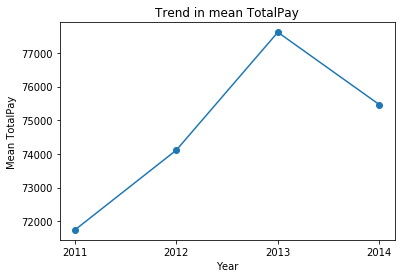

In [72]:
pay_trend.plot(x='Year',y='Avg_Tot_Pay',legend=False,marker="o")
plt.title("Trend in mean TotalPay")
plt.xticks(pay_trend.Year)
plt.ylabel("Mean TotalPay")
plt.show

# 7.What are the top 5 jobs in terms of mean TotalPay in the recent year (2014)?

In [75]:
pd.read_sql('''SELECT JobTitle, ROUND(AVG(TotalPay),2) AS 'Avg_Tot_Pay'
FROM SALARIES
WHERE Year = 2014
GROUP BY JobTitle
ORDER BY 2 DESC
LIMIT 5''',conn)

,JobTitle,Avg_Tot_Pay
0,Chief Investment Officer,339653.70
1,Chief of Police,326716.76
2,"Chief, Fire Department",326233.44
3,"Gen Mgr, Public Trnsp Dept",294000.18
4,Dep Chf of Dept (Fire Dept),285575.79


# 8.What's the trend in Average TotalPay for the above 5 jobs?

    Year                     JobTitle  Avg_TotalPay
0   2012              Chief of Police     321552.11
1   2012       Chief, Fire Department     314759.60
2   2012   Gen Mgr, Public Trnsp Dept     294000.17
3   2012  Dep Chf of Dept (Fire Dept)     224253.94
4   2013              Chief of Police     339282.07
5   2013       Chief, Fire Department     336922.01
6   2013   Gen Mgr, Public Trnsp Dept     305307.89
7   2013  Dep Chf of Dept (Fire Dept)     292964.78
8   2014     Chief Investment Officer     339653.70
9   2014              Chief of Police     326716.76
10  2014       Chief, Fire Department     326233.44
11  2014   Gen Mgr, Public Trnsp Dept     294000.18
12  2014  Dep Chf of Dept (Fire Dept)     285575.79


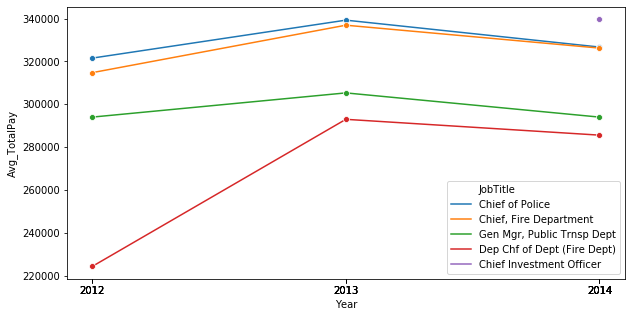

In [80]:
trend = pd.read_sql("""SELECT Year,JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE JobTitle IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) desc LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay) desc""",conn)

print(trend)
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Avg_TotalPay",marker="o",data=trend,hue="JobTitle")
plt.xticks(trend.Year)
plt.show()

In [82]:
pd.read_sql('''SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) desc LIMIT 5''',conn)

,JobTitle
0,Chief Investment Officer
1,Chief of Police
2,"Chief, Fire Department"
3,"Gen Mgr, Public Trnsp Dept"
4,Dep Chf of Dept (Fire Dept)


# 9. What are the bottom 5 jobs in terms of mean TotalPay in the recent year (2014)?

In [84]:
pd.read_sql('''SELECT JobTitle, ROUND(AVG(TotalPay),2) AS 'Avg_Tot_Pay'
FROM SALARIES
WHERE Year = 2014 AND TotalPay>0
GROUP BY JobTitle
ORDER BY 2 ASC
LIMIT 5''',conn)

,JobTitle,Avg_Tot_Pay
0,"BdComm Mbr, Grp2,M=$25/Mtg",325.00
1,"BdComm Mbr, Grp3,M=$50/Mtg",726.50
2,Special Examiner,1141.17
3,"BdComm Mbr, Grp5,M$100/Mo",1300.12
4,Cashier 3,2074.60


# 10. What's the trend in Average TotalPay for the above 5 jobs?

In [86]:
pd.read_sql("""SELECT Year,JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE JobTitle IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) ASC LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay) ASC""",conn)

,Year,JobTitle,Avg_TotalPay
0,2012,"BdComm Mbr, Grp2,M=$25/Mtg",263.19
1,2012,"BdComm Mbr, Grp3,M=$50/Mtg",734.76
2,2012,"BdComm Mbr, Grp5,M$100/Mo",1142.72
3,2012,Special Examiner,2373.52
4,2013,"BdComm Mbr, Grp2,M=$25/Mtg",200.16
5,2013,"BdComm Mbr, Grp3,M=$50/Mtg",699.27
6,2013,Special Examiner,1195.50
7,2013,"BdComm Mbr, Grp5,M$100/Mo",1210.54
8,2014,"BdComm Mbr, Grp2,M=$25/Mtg",325.00
9,2014,"BdComm Mbr, Grp3,M=$50/Mtg",691.90


# 11. Which employee earned the most in terms of TotalPay by Year?

In [88]:
pd.read_sql("""SELECT EmployeeName,Year, MAX(TotalPay)
FROM SALARIES
GROUP BY Year""",conn)

,EmployeeName,Year,MAX(TotalPay)
0,NATHANIEL FORD,2011,567595.43
1,Gary Altenberg,2012,362844.66
2,Samson Lai,2013,347102.32
3,David Shinn,2014,471952.64


# 12. Which employee earned the least in terms of TotalPay by Year?

In [90]:
pd.read_sql("""SELECT EmployeeName,Year, MIN(TotalPay)
FROM SALARIES
WHERE TotalPAy>0
GROUP BY Year""",conn)

,EmployeeName,Year,MIN(TotalPay)
0,JOE BROWN JR,2011,0.30
1,Donald Clark,2012,1.77
2,Nereida Vega,2013,5.56
3,Sylvia R Jones,2014,1.83


# Bonus: Is there any pattern in salaries of Junior, Senior, and Chief employee titles across the board?

In [94]:
pd.read_sql("""SELECT CASE WHEN LOWER(JobTitle) LIKE '%junior%' THEN 'Junior' 
             WHEN LOWER(JobTitle) LIKE '%senior%' THEN 'Senior' 
             WHEN LOWER(JobTitle) LIKE '%chief%' THEN 'Chief' 
             ELSE 'Others' END 
             AS Title,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE TotalPay>0 GROUP BY Title ORDER BY AVG(TotalPay)""",conn)

,Title,Avg_TotalPay
0,Junior,27340.15
1,Senior,74463.22
2,Others,75053.37
3,Chief,168134.11
